# More recursion examples
## Learning objectives
After this section

You will be familiar with binary trees and some recursive algorithms used to process them


The real advantages of recursion become evident when we come across problems where iterative solutions are difficult to write. Let's take a look at binary trees, for instance. A binary tree is a branched structure where we have nodes, and at each node the structure branches, at most, into two child branches with nodes of their own. A binary tree could then look like this (computer science is often considered a branch of the natural sciences, but our understanding of trees is a little topsy-turvy, as you'll notice):


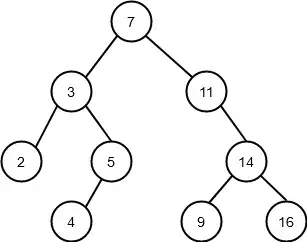

Binary trees should at least theoretically be easy to handle recursively: if we want to perform some operation on every node in the tree, our algorithm simply needs to

1. Process the current node
1. Call itself on the child node on the left
1. Call itself on the child node on the right


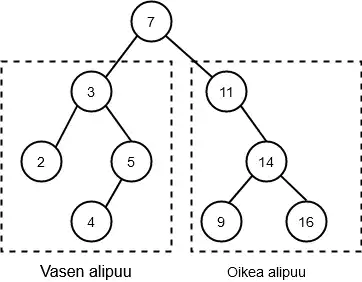


As you can see from the image above, both the left and right "subtrees" are fully fledged binary trees themselves, and the only node left outside the recursive calls is the parent node, which is processed in step 1, before calling the function recursively. So, we can be sure that when the execution of the function finishes, each node has been visited exactly once.

An iterative version of a binary tree traversal would be much more complicated, as we would have to somehow keep track of all the nodes we have already visited. The same principles are true for all computational tree structures, not just binary ones.

A binary tree is easily modelled in Python code as well. We only need to write a class definition for a single node. It has a value attribute and attributes for the left and right child nodes:


In [1]:


class Node:
    """ The class represents a single node in a binary tree """
    def __init__(self, value, left_child:'Node' = None, right_child:'Node' = None):
        self.value = value
        self.left_child = left_child
        self.right_child = right_child


Now let's assume we want to model the following tree:


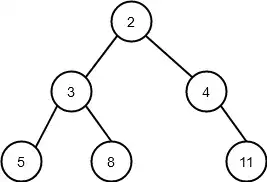

We could achieve this with the following code:


In [2]:

if __name__ == "__main__":
    tree = Node(2)

    tree.left_child = Node(3)
    tree.left_child.left_child = Node(5)
    tree.left_child.right_child = Node(8)

    tree.right_child = Node(4)
    tree.right_child.right_child = Node(11)


## **Recursive binary tree algorithms**
First, let's take a look at an algorithm which prints out all the nodes in a binary tree one by one. In these following examples we will be working with the binary tree defined above.

The argument to the printing function is the root node of the binary tree. This is the node at the very top in our illustration above. All other nodes are children to this node:


In [5]:


def print_nodes(root: Node):
    print(root.value)

    if root.left_child is not None:
        print_nodes(root.left_child)

    if root.right_child is not None:
        print_nodes(root.right_child)

if __name__ == "__main__":
    tree = Node(2)

    tree.left_child = Node(3)
    tree.left_child.left_child = Node(5)
    tree.left_child.right_child = Node(8)

    tree.right_child = Node(4)
    tree.right_child.right_child = Node(11)

    print_nodes(tree)


2
3
5
8
4
11


The function prints the value of the node passed as an argument, and then calls itself on the left and right child nodes, assuming the nodes are defined. This is a very simple algorithm, but it efficiently and reliably traverses all nodes in the tree, no matter the size of the tree. Crucially, no node is visited twice. Each value is printed only once.

If we pass the root node tree of the binary tree illustrated above as an argument to the function, it prints out



Sample output
```console
2
3
5
8
4
11
```



As you can see from the order of the nodesin the printout, the algorithm first moves down the "left leg" of the tree down to the very bottom, and from there traverses the other nodes in order.

Similarly, we can write an algorithm for calculating the sum of all the values stored in the nodes of the tree:


In [8]:

def sum_of_nodes(root: Node):
    node_sum = root.value

    if root.left_child is not None:
        node_sum += sum_of_nodes(root.left_child)

    if root.right_child is not None:
        node_sum += sum_of_nodes(root.right_child)

    return node_sum

if __name__ == "__main__":
    tree = Node(2)

    tree.left_child = Node(3)
    tree.left_child.left_child = Node(5)
    tree.left_child.right_child = Node(8)

    tree.right_child = Node(4)
    tree.right_child.right_child = Node(11)

    print_nodes(tree)
    print(sum_of_nodes(tree))


2
3
5
8
4
11
33


The variable node_sum is initialised to equal the value of the current node. The value in the variable is then augmented by recursive calls to the node sums of the left and right child trees (first making sure they exist, of course). This result is then returned

# Programming exercise:Greatest node

Please write a function named greatest_node(root: Node) which takes the root node of a binary tree as its argument.

The function should return the node with the greatest value within the tree. The tree should be traversed recursively.

Hint: the function sum_of_nodes in the example above may come in handy.

An example of how the function should work:

```python
if __name__ == "__main__":
    tree = Node(2)

    tree.left_child = Node(3)
    tree.left_child.left_child = Node(5)
    tree.left_child.right_child = Node(8)

    tree.right_child = Node(4)
    tree.right_child.right_child = Node(11)

    print(greatest_node(tree))
```
Sample output
11

In [11]:
def greatest_node(root: Node):
    greatest = root.value

    #check for the greatest left child
    if root.left_child is not None:
        left = greatest_node(root.left_child)
        if left > greatest:
            greatest = left

    if root.right_child is not None:
        right = greatest_node(root.right_child)
        if right > greatest:
            greatest = right

    return greatest

if __name__ == "__main__":
    tree = Node(2)

    tree.left_child = Node(3)
    tree.left_child.left_child = Node(5)
    tree.left_child.right_child = Node(8)

    tree.right_child = Node(4)
    tree.right_child.right_child = Node(11)

    print(greatest_node(tree))

11


[link as to how it works](https://pythontutor.com/render.html#code=class%20Node%3A%0A%20%20%20%20%22%22%22%20The%20class%20represents%20a%20single%20node%20in%20a%20binary%20tree%20%22%22%22%0A%20%20%20%20def%20__init__%28self,%20value,%20left_child%3A'Node'%20%3D%20None,%20right_child%3A'Node'%20%3D%20None%29%3A%0A%20%20%20%20%20%20%20%20self.value%20%3D%20value%0A%20%20%20%20%20%20%20%20self.left_child%20%3D%20left_child%0A%20%20%20%20%20%20%20%20self.right_child%20%3D%20right_child%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%0Adef%20greatest_node%28root%3A%20Node%29%3A%0A%20%20%20%20greatest%20%3D%20root.value%0A%0A%20%20%20%20%23check%20for%20the%20greatest%20left%20child%0A%20%20%20%20if%20root.left_child%20is%20not%20None%3A%0A%20%20%20%20%20%20%20%20left%20%3D%20greatest_node%28root.left_child%29%0A%20%20%20%20%20%20%20%20if%20left%20%3E%20greatest%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20greatest%20%3D%20left%0A%0A%20%20%20%20if%20root.right_child%20is%20not%20None%3A%0A%20%20%20%20%20%20%20%20right%20%3D%20greatest_node%28root.right_child%29%0A%20%20%20%20%20%20%20%20if%20right%20%3E%20greatest%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20greatest%20%3D%20right%0A%0A%20%20%20%20return%20greatest%0A%0Aif%20__name__%20%3D%3D%20%22__main__%22%3A%0A%20%20%20%20tree%20%3D%20Node%282%29%0A%0A%20%20%20%20tree.left_child%20%3D%20Node%283%29%0A%20%20%20%20tree.left_child.left_child%20%3D%20Node%285%29%0A%20%20%20%20tree.left_child.right_child%20%3D%20Node%288%29%0A%0A%20%20%20%20tree.right_child%20%3D%20Node%284%29%0A%20%20%20%20tree.right_child.right_child%20%3D%20Node%2811%29%0A%0A%20%20%20%20print%28greatest_node%28tree%29%29&cumulative=false&curInstr=91&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)



# A sorted binary tree
A binary tree is especially useful when the nodes are sorted in a certain way. This makes finding nodes in the tree fast and efficient.

Let's take a look a tree which is sorted as follows: the left child of each node is smaller than the node itself, and the right child is correspondingly greater.



![11_4_1 (1).webp](<attachment:11_4_1 (1).webp>)

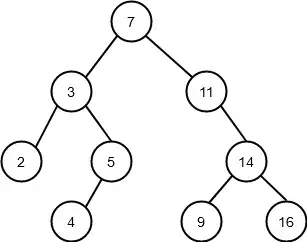

Now we can write a recursive algorithm for searching for nodes. The idea is very similar to the binary search from the previous section: if the current node is the node we are looking for, return True. Else, continue recursively with either the left or the right child tree. If the node is not defined, return False.


In [ ]:

def find_node(root: Node, value):
    if root is None:
        return False

    if value == root.value:
        return True

    if value > root.value:
        return find_node(root.right_child, value)

    return find_node(root.left_child, value)

# Revisiting the times before recursion
Let's finish off this part of the material with a slightly larger exercise concentrating on object oriented programming principles. We do not recommend using recursion in this series of tasks, but list comprehension techniques will come in useful.

# Programming exercise:OrderBook

NB: Some exercises have multiple parts, and you can receive points for the different parts separately. You can submit a partially completed exercise by choosing 'Submit Solution' from the menu next to the button for executing tests .

In this exercise you will write two different classes, which will in turn form the backbone of the programming exercise which follows this one, where you will write an interactive application.

## Task
Please write a class named Task which models a single task in a software company's list of tasks. Tasks have

* a description
* an estimate of the hours required for completing the task
* the name of the programmer assigned to the task
* a field for keeping track of whether the task is finished
* a unique identifier

The class is used as follows:

```python
t1 = Task("program hello world", "Eric", 3)
print(t1.id, t1.description, t1.programmer, t1.workload)
print(t1)
print(t1.is_finished())
t1.mark_finished()
print(t1)
print(t1.is_finished())
t2 = Task("program webstore", "Adele", 10)
t3 = Task("program mobile app for workload accounting", "Eric", 25)
print(t2)
print(t3)
```
Sample output
```console
1 program hello world Eric 3
1: program hello world (3 hours), programmer Eric NOT FINISHED
False
1: program hello world (3 hours), programmer Eric FINISHED
True
2: program webstore (10 hours), programmer Adele NOT FINISHED
3: program mobile app for workload accounting (25 hours), programmer Eric NOT FINISHED
```

Some clarifications:

the state of the task (finished or not yet finished) can be checked with the function is_finished(self) which returns a Boolean value
a task is not finished when it is created
a task is marked as finished by calling the method mark_finished(self)
the id of a task is a running number which starts with 1. The id of the first task is 1, the id of the second is 2, and so forth.
Hint: id can be implemented as a class variable.

In [24]:
class Task:
    new_id = 0
    def __init__(self, description: str, name: str, workload: int):
        Task.new_id += 1
        self.description = description
        self.programmer = name
        self.workload = workload
        self.track = "NOT FINISHED"
        self.id = Task.new_id

    def is_finished(self):
        if self.track == "NOT FINISHED":
            return False

        return True
    
    def mark_finished(self):
        self.track = "FINISHED"
    
    def __str__(self) -> str:
        return f'{self.id}: {self.description} ({self.workload} hours), programmer {self.programmer} {self.track}'
    



t1 = Task("program hello world", "Eric", 3)
print(t1.id, t1.description, t1.programmer, t1.workload)
print(t1)
print(t1.is_finished())
t1.mark_finished()
print(t1)
print(t1.is_finished())
t2 = Task("program webstore", "Adele", 10)
t3 = Task("program mobile app for workload accounting", "Eric", 25)
print(t2)
print(t3)

1 program hello world Eric 3
1: program hello world (3 hours), programmer Eric NOT FINISHED
False
1: program hello world (3 hours), programmer Eric FINISHED
True
2: program webstore (10 hours), programmer Adele NOT FINISHED
3: program mobile app for workload accounting (25 hours), programmer Eric NOT FINISHED


# OrderBook
Please write a class named OrderBook which collects all the tasks ordered from the software company. The tasks should be modelled with the class Task you just wrote.

The basic version of an OrderBook is used as follows:

```python
orders = OrderBook()
orders.add_order("program webstore", "Adele", 10)
orders.add_order("program mobile app for workload accounting", "Eric", 25)
orders.add_order("program app for practising mathematics", "Adele", 100)

for order in orders.all_orders():
    print(order)

print()

for programmer in orders.programmers():
    print(programmer)
```
Sample output
```console
1: program webstore (10 hours), programmer Adele NOT FINISHED
2: program mobile app for workload accounting (25 hours), programmer Eric NOT FINISHED
3: program app for practising mathematics (100 hours), programmer Adele NOT FINISHED

Adele
Eric
```

At this stage your OrderBook should provide three methods:

add_order(self, description, programmer, workload) which adds a new order to the OrderBook. An OrderBook stores the orders internally as Task objects. NB: the method should take exactly the arguments mentioned, or else the automated tests will not work correctly.
all_orders(self) returns a list of all the tasks stored in the OrderBook
programmers(self) returns a list of the names of all the programmers with tasks stored in the OrderBook. The list should contain each programmer only once
Hint: an easy method for removing duplicates is handling the list initially as a set. A set is a collection of items where each unique item appears only once. A set can be then converted back into a list, and we can then be sure each item is now unique:

```python
my_list = [1,1,3,6,4,1,3]
my_list2 = list(set(my_list))
print(my_list)
print(my_list2)
```
Sample output
```console
[1, 1, 3, 6, 4, 1, 3]
[1, 3, 4, 6]
```

In [33]:
class Task:
    new_id = 0
    def __init__(self, description: str, name: str, workload: int):
        Task.new_id += 1
        self.description = description
        self.programmer = name
        self.workload = workload
        self.track = "NOT FINISHED"
        self.id = Task.new_id

    def is_finished(self):
        if self.track == "NOT FINISHED":
            return False

        return True
    
    def mark_finished(self):
        self.track = "FINISHED"
    
    def __str__(self) -> str:
        return f'{self.id}: {self.description} ({self.workload} hours), programmer {self.programmer} {self.track}'

class OrderBook:
    def __init__(self):
        self.__task = Task
        self.__order = []

    def add_order(self, description: str, name: str, workload: int):
        task = self.__task(description=description, name=name, workload=workload)
        self.__order.append(task)

    def all_orders(self):
        return self.__order
    
    def programmers(self):
        return list(set([item.programmer for item in self.all_orders()]))
        


orders = OrderBook()
orders.add_order("program webstore", "Adele", 10)
orders.add_order("program mobile app for workload accounting", "Eric", 25)
orders.add_order("program app for practising mathematics", "Adele", 100)

for order in orders.all_orders():
    print(order)

print()

for programmer in orders.programmers():
    print(programmer)

1: program webstore (10 hours), programmer Adele NOT FINISHED
2: program mobile app for workload accounting (25 hours), programmer Eric NOT FINISHED
3: program app for practising mathematics (100 hours), programmer Adele NOT FINISHED

Eric
Adele


In [44]:
class Task:
    new_id = 0
    def __init__(self, description: str, name: str, workload: int):
        Task.new_id += 1
        self.description = description
        self.programmer = name
        self.workload = workload
        self.track = "NOT FINISHED"
        self.id = Task.new_id

    def is_finished(self):
        if self.track == "NOT FINISHED":
            return False

        return True
    
    def mark_finished(self):
        self.track = "FINISHED"
    
    def __str__(self) -> str:
        return f'{self.id}: {self.description} ({self.workload} hours), programmer {self.programmer} {self.track}'

class OrderBook:
    def __init__(self):
        self.__task = Task
        self.__order = []

    def add_order(self, description: str, name: str, workload: int):
        task = self.__task(description=description, name=name, workload=workload)
        self.__order.append(task)

    def all_orders(self):
        return self.__order
    
    def programmers(self):
        return list(set([item.programmer for item in self.all_orders()]))
    
    def mark_finished(self, id: int):
        for task in self.__order:
            if task.id == id:
                task.mark_finished()
                return
            
        raise ValueError(f'order with {id} does not exist')
    
    def finished_orders(self):
        return [task for task in self.__order if task.is_finished() == True]
    
    def unfinished_orders(self):
        return [task for task in self.__order if task.is_finished() == False]        


orders = OrderBook()
orders.add_order("program webstore", "Adele", 10)
orders.add_order("program mobile app for workload accounting", "Eric", 25)
orders.add_order("program app for practising mathematics", "Adele", 100)

orders.mark_finished(1)
orders.mark_finished(2)

for order in orders.all_orders():
    print(order)

1: program webstore (10 hours), programmer Adele FINISHED
2: program mobile app for workload accounting (25 hours), programmer Eric FINISHED
3: program app for practising mathematics (100 hours), programmer Adele NOT FINISHED


Finishing touches to OrderBook
Please write one last method in your OrderBook class: status_of_programmer(self, programmer: str) which returns a tuple. The tuple should contain the number of finished and unfinished tasks the programmer has assigned to them, along with the estimated hours in both categories.

```python
orders = OrderBook()
orders.add_order("program webstore", "Adele", 10)
orders.add_order("program mobile app for workload accounting", "Adele", 25)
orders.add_order("program app for practising mathematics", "Adele", 100)
orders.add_order("program the next facebook", "Eric", 1000)

orders.mark_finished(1)
orders.mark_finished(2)

status = orders.status_of_programmer("Adele")
print(status)
```
Sample output
```console
(2, 1, 35, 100)
```

The first item in the tuple is the number of finished tasks, while the second item is the number of unfinished tasks. The third and fourth items are the sums of workload estimates for the finished and unfinished tasks, respectively.

If there is no programmer with the given name, the method should raise a ValueError exception.

In [3]:
class Task:
    new_id = 0
    def __init__(self, description: str, name: str, workload: int):
        Task.new_id += 1
        self.description = description
        self.programmer = name
        self.workload = workload
        self.track = "NOT FINISHED"
        self.id = Task.new_id

    def is_finished(self):
        if self.track == "NOT FINISHED":
            return False

        return True
    
    def mark_finished(self):
        self.track = "FINISHED"
    
    def __str__(self) -> str:
        return f'{self.id}: {self.description} ({self.workload} hours), programmer {self.programmer} {self.track}'

class OrderBook:
    def __init__(self):
        self.__task = Task
        self.__order = []

    def add_order(self, description: str, name: str, workload: int):
        task = self.__task(description=description, name=name, workload=workload)
        self.__order.append(task)

    def all_orders(self):
        return self.__order
    
    def programmers(self):
        return list(set([item.programmer for item in self.all_orders()]))
    
    def mark_finished(self, id: int):
        for task in self.__order:
            if task.id == id:
                task.mark_finished()
                return
            
        raise ValueError(f'order with {id} does not exist')
    
    def finished_orders(self):
        return [task for task in self.__order if task.is_finished() == True]
    
    def unfinished_orders(self):
        return [task for task in self.__order if task.is_finished() == False]     

    def status_of_programmer(self, programmer: str):
        if programmer not in self.programmers():
            raise ValueError(f'No such {programmer} exists')
        
        status = [task for task in self.all_orders() if task.programmer == programmer]
        # for task in self.all_orders():
        #     if task.programmer == programmer:
        #         status.append(task)

        finished_tasks = 0
        unfinished_tasks = 0
        finished_tasks_hours = 0
        unfinished_tasks_hours = 0
        

        for task in status:
            if task.is_finished() == True:
                finished_tasks += 1
                finished_tasks_hours += task.workload
            else:
                unfinished_tasks += 1
                unfinished_tasks_hours += task.workload

        final_status = (finished_tasks, unfinished_tasks, finished_tasks_hours, unfinished_tasks_hours)

        return final_status
        
    



orders = OrderBook()
orders.add_order("program webstore", "Adele", 10)
orders.add_order("program mobile app for workload accounting", "Adele", 25)
orders.add_order("program app for practising mathematics", "Adele", 100)
orders.add_order("program the next facebook", "Eric", 1000)

orders.mark_finished(1)
orders.mark_finished(2)

status = orders.status_of_programmer("Adele")
print(status)

(2, 1, 35, 100)


# Programming exercise:Order book application

NB: Some exercises have multiple parts, and you can receive points for the different parts separately. You can submit a partially completed exercise by choosing 'Submit Solution' from the menu next to the button for executing tests .

In this exercise you will create an interactive application for administering the tasks ordered from a software company. The implementation is completely up to you, but you may use the building blocks from the previous exercise in your application. The examples in the last section of part 10 can also prove useful.

## Without error handling
The application should work exactly as follows:

Sample output
```console
commands:
0 exit
1 add order
2 list finished tasks
3 list unfinished tasks
4 mark task as finished
5 programmers
6 status of programmer

command: 1
description: program the next facebook
programmer and workload estimate: jonah 1000
added!

command: 1
description: program mobile app for workload accounting
programmer and workload estimate: eric 25
added!

command: 1
description: program an app for music theory revision
programmer and workload estimate: nina 12
added!

command: 1
description: program the next twitter
programmer and workload estimate: jonah 55
added!

command: 2
no finished tasks

command: 3
1: program the next facebook (1000 hours), programmer jonah NOT FINISHED
2: program mobile app for workload accounting (25 hours), programmer eric NOT FINISHED
3: program an app for music theory revision (12 hours), programmer nina NOT FINISHED
4: program the next twitter (55 hours), programmer jonah NOT FINISHED

command: 4
id: 2
marked as finished

command: 4
id: 4
marked as finished

command: 2
2: program mobile app for workload accounting (25 hours), programmer eric FINISHED
4: program the next twitter (55 hours), programmer jonah FINISHED

command: 3
1: program the next facebook (1000 hours), programmer jonah NOT FINISHED
3: program an app for music theory revision (12 hours), programmer nina NOT FINISHED

command: 5
jonah
eric
nina

command: 6
programmer: jonah
tasks: finished 2 not finished 1, hours: done 55 scheduled 1000
```

In [13]:
class Task:
    new_id = 0
    def __init__(self, description: str, name: str, workload: int):
        Task.new_id += 1
        self.description = description
        self.programmer = name
        self.workload = workload
        self.track = "NOT FINISHED"
        self.id = Task.new_id

    def is_finished(self):
        if self.track == "NOT FINISHED":
            return False

        return True
    
    def mark_finished(self):
        self.track = "FINISHED"
    
    def __str__(self) -> str:
        return f'{self.id}: {self.description} ({self.workload} hours), programmer {self.programmer} {self.track}'

class OrderBook:
    def __init__(self):
        self.__task = Task
        self.__order = []

    def add_order(self, description: str, name: str, workload: int):
        task = self.__task(description=description, name=name, workload=workload)
        self.__order.append(task)

    def all_orders(self):
        return self.__order
    
    def programmers(self):
        return list(set([item.programmer for item in self.all_orders()]))
    
    def mark_finished(self, id: int):
        for task in self.__order:
            if task.id == id:
                task.mark_finished()
                return
            
        raise ValueError(f'order with {id} does not exist')
    
    def finished_orders(self):
        return [task for task in self.__order if task.is_finished() == True]
    
    def unfinished_orders(self):
        return [task for task in self.__order if task.is_finished() == False]     

    def status_of_programmer(self, programmer: str):
        if programmer not in self.programmers():
            raise ValueError(f'No such {programmer} exists')
        
        status = [task for task in self.all_orders() if task.programmer == programmer]
        # for task in self.all_orders():
        #     if task.programmer == programmer:
        #         status.append(task)

        finished_tasks = 0
        unfinished_tasks = 0
        finished_tasks_hours = 0
        unfinished_tasks_hours = 0
        

        for task in status:
            if task.is_finished() == True:
                finished_tasks += 1
                finished_tasks_hours += task.workload
            else:
                unfinished_tasks += 1
                unfinished_tasks_hours += task.workload

        final_status = (finished_tasks, unfinished_tasks, finished_tasks_hours, unfinished_tasks_hours)

        return final_status
        
class OrderBookApplication:
    def __init__(self) -> None:
        self.__orderbook = OrderBook()

    def help(self):
        print("commands:")
        print("0 exit")
        print("1 add order")
        print("2 list finished tasks")
        print("3 list unfinished tasks")
        print("4 mark task as finished")
        print("5 programmers")
        print("6 status of programmer")

    def add_order(self):
        description = input("description: ")
        details = input("programmer and workload estimate")
        name = details.split()[0]
        try:
            workload = int(details.split()[1])
        except:
            self.error()
            return
        
        self.__orderbook.add_order(description, name, workload)
        print("added!")

    def list_finished_tasks(self):
        if len(self.__orderbook.finished_orders()):
            for task in self.__orderbook.finished_orders():
                print(task)
        else:
            print('no finished tasks')

    def list_unfinished_tasks(self):
        if len(self.__orderbook.unfinished_orders()):
            for task in self.__orderbook.unfinished_orders():
                print(task)
        else:
            print('no unfinished tasks')       

    def mark_task_as_finished(self):
        id = int(input("id: "))
        ids = [task.id for task in self.__orderbook.all_orders()]
        if id not in ids:
            self.error()
            return

        self.__orderbook.mark_finished(id)

        print("marked as finished")


    def programmers(self):
        for programmer in self.__orderbook.programmers():
            print(programmer)

    def status_of_programmer(self):
        programmer = input("programmer: ")
        if programmer not in self.__orderbook.programmers():
            self.error()
            return

        details = self.__orderbook.status_of_programmer(programmer)

        return f'tasks: finished {details[0]} not finished {details[1]}, hours: done {details[2]} scheduled {details[3]}'
    
    def error(self):
        print("erroneous input")



    def execute(self):
        self.help()
        while True:
            print("")
            command = input("command: ")
            if command == "0":
                break
            elif command == "1":
                self.add_order()
            elif command == "2":
                self.list_finished_tasks()
            elif command == "3":
                self.list_unfinished_tasks()
            elif command == "4":
                self.mark_task_as_finished()
            elif command == "5":
                self.programmers()
            elif command == "6":
                self.status_of_programmer()
            else:
                self.help

application = OrderBookApplication()
application.execute()            

        

In [8]:
sentence = "This is a sample sentence."

words = sentence.split()

second_word = sentence.split()[1]

print(second_word)


is
